In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ga import GA
from graph import Graph

In [3]:
g = Graph.from_file("instances/myciel4.col")
nb_runs = 50
population_size = 50
max_generations = 120

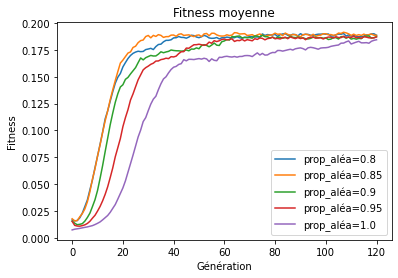

In [4]:
fig, ax = plt.subplots()
x = np.arange(0, max_generations + 1)
rand_proportions = np.arange(0.8, 1.01, 0.05).round(2)
f = open("ga_concepts/parameters/rand_proportions.npy", "wb")
for rand_proportion in rand_proportions:
    total_avgs_fitness = np.zeros(max_generations + 1)
    for _ in range(nb_runs):
        col = GA(g, population_size=population_size, max_generations=max_generations, rand_proportion=rand_proportion)
        gens_info, t = col.solve()
        total_avgs_fitness += np.array(gens_info[3])
    total_avgs_fitness /= nb_runs
    np.save(f, total_avgs_fitness)
    ax.plot(x, total_avgs_fitness, label=f"prop_aléa={rand_proportion}")
f.close()
ax.set_title("Fitness moyenne")
ax.set_xlabel("Génération")
ax.set_ylabel("Fitness")
ax.legend()
fig.savefig("ga_concepts/parameters/rand_proportions_tmp.pdf", bbox_inches='tight')